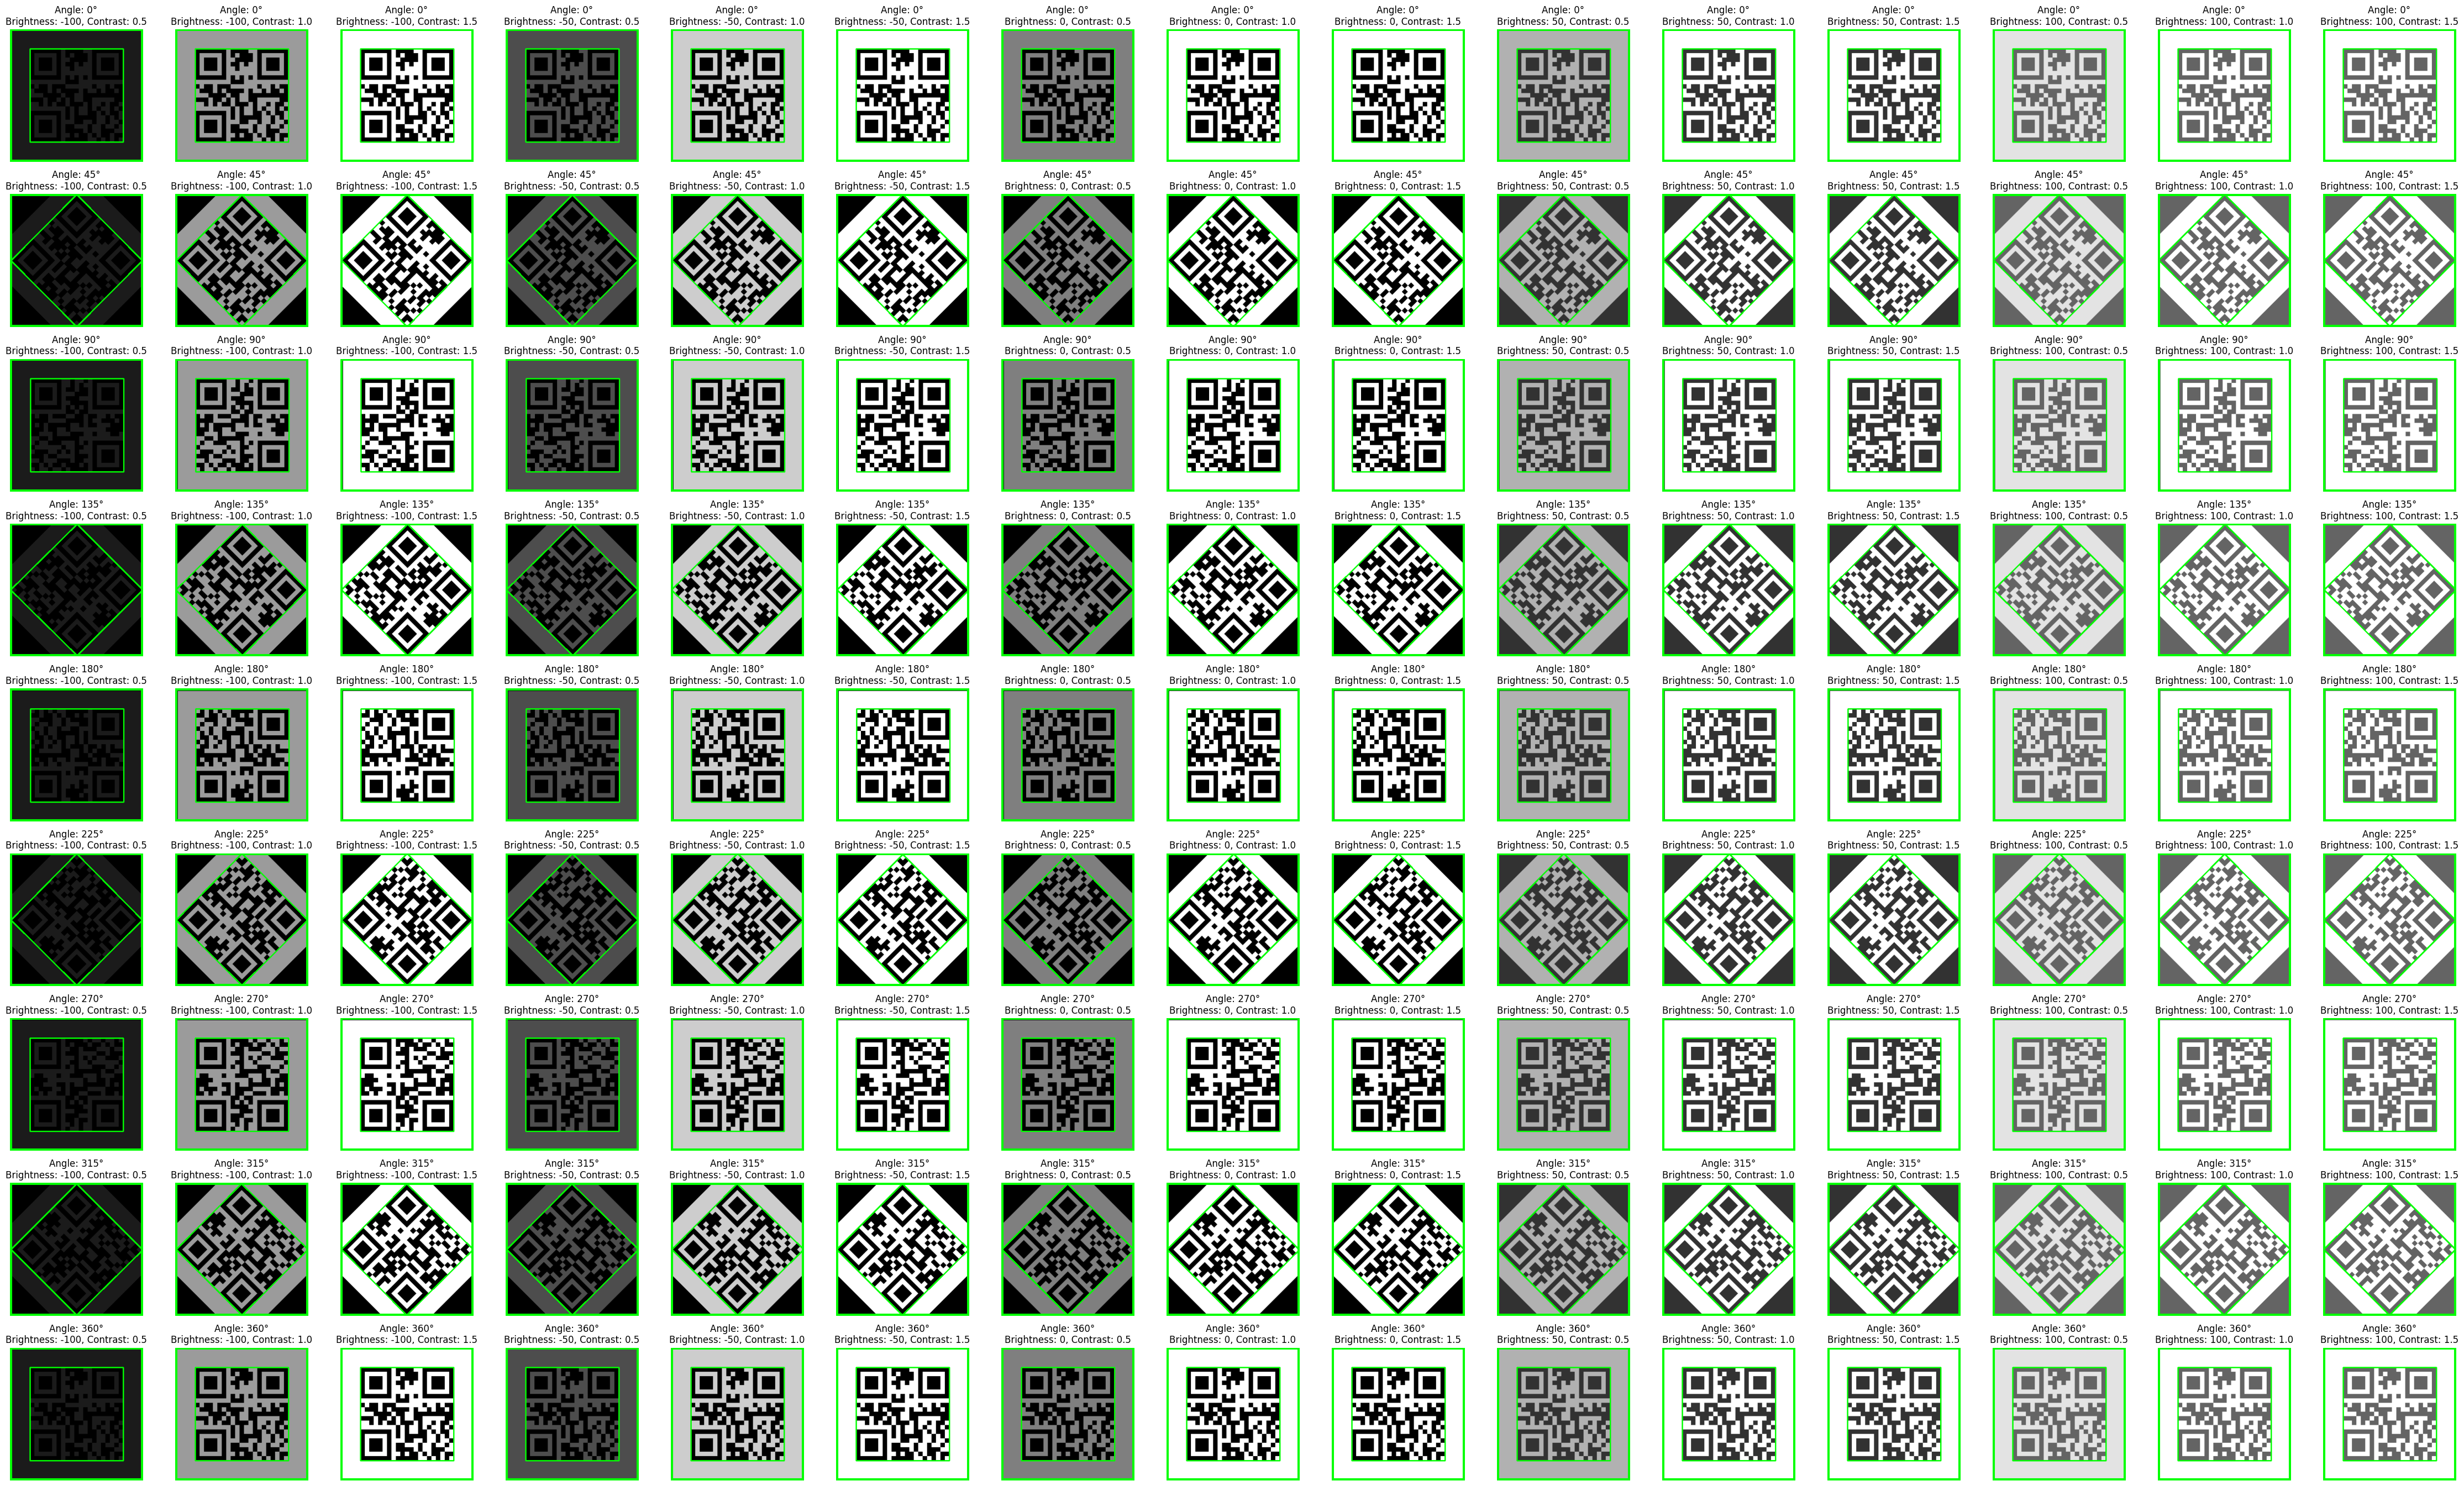

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pyzbar.pyzbar import decode

img_path = "/content/drive/MyDrive/1026-v1.png"

# Function to get the list of angles for rotation
def get_angles_list():
    return [0, 45, 90, 135, 180, 225, 270, 315, 360]

# Function to get the list of brightness values for adjusting lighting
def get_brightness_values():
    return [-100, -50, 0, 50, 100]

# Function to get the list of contrast values for adjusting lighting
def get_contrast_values():
    return [0.5, 1.0, 1.5]

# Function to adjust brightness and contrast
def adjust_brightness_contrast(image, brightness, contrast):
    adjusted_image = np.clip(image * contrast + brightness, 0, 255).astype(np.uint8)
    return adjusted_image

# Function to rotate an image with specified angle
def rotate_bound(image, angle):
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

# Function to decode QR codes from an image
def decode_qr_code(image):
    decoded_data = decode(image)
    qr_codes = []
    for qr in decoded_data:
        qr_codes.append((qr.data.decode('utf-8'), qr.polygon))
    return qr_codes

# Function to draw lines connecting the corners of a QR code
def draw_line(image, polygon):
    pts = np.array(polygon, np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.polylines(image, [pts], True, (0, 255, 0), 2)

# Main function to display QR codes with different angles and lighting conditions
def display_qr_codes_with_angles_and_lighting(image_path):
    try:
        # Read the input image
        image = cv2.imread(image_path)

        # Get the lists of angles, brightness values, and contrast values
        angles_list = get_angles_list()
        brightness_values = get_brightness_values()
        contrast_values = get_contrast_values()

        # List of authorized QR codes
        authorized_qr_codes = ["1111", "1026", "1022"]

        # Calculate the number of rows and columns for the subplots
        rows, cols = len(angles_list), len(brightness_values) * len(contrast_values)

        # Create the subplots for displaying images
        fig, axs = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))

        # Loop through each angle and apply rotation
        for i in range(len(angles_list)):
            angle = angles_list[i]
            rotated_image = rotate_bound(image, angle)

            # Loop through each brightness value and contrast value to simulate different lighting conditions
            for j in range(len(brightness_values)):
                brightness = brightness_values[j]
                for k in range(len(contrast_values)):
                    contrast = contrast_values[k]

                    # Adjust brightness and contrast
                    adjusted_image = adjust_brightness_contrast(rotated_image, brightness, contrast)

                    # Decode QR codes from the adjusted image
                    qr_codes = decode_qr_code(adjusted_image)

                    # Draw lines connecting the QR code corners
                    for qr_code_data, qr_code_polygon in qr_codes:
                        draw_line(adjusted_image, qr_code_polygon)

                    col = j * len(contrast_values) + k

                    # Check if the decoded QR code is authorized or not
                    decoded_qr_data = qr_codes[0][0] if qr_codes else None
                    if decoded_qr_data in authorized_qr_codes:
                        border_color = (0, 255, 0)  # Green border for authorized QR codes
                    else:
                        border_color = (0, 0, 255)  # Red border for unauthorized QR codes

                    # Add border to the adjusted image based on authorization
                    adjusted_image_with_border = cv2.copyMakeBorder(adjusted_image, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=border_color)

                    # Display the image with the decoded data and title for each subplot
                    axs[i, col].imshow(cv2.cvtColor(adjusted_image_with_border, cv2.COLOR_BGR2RGB))
                    axs[i, col].set_title(f'Angle: {angle}°\nBrightness: {brightness}, Contrast: {contrast}')
                    axs[i, col].axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print("Error:", str(e))

# Call the main function to display QR codes with different angles and lighting conditions
display_qr_codes_with_angles_and_lighting(img_path)


In [3]:
!apt-get install libzbar0
!pip install pyzbar


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 238 kB of archives.
After this operation, 817 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libv4lconvert0 amd64 1.18.0-2build1 [76.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libv4l-0 amd64 1.18.0-2build1 [41.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libzbar0 amd64 0.23-1.3 [119 kB]
Fetched 238 kB in 0s (724 kB/s)
Selecting previously unselected package libv4lconvert0:amd64.
(Reading database ... 123105 files and directories currently installed.)
Preparing to unpack .../libv4lconvert0_1.18.0-2build1_amd64.deb ...
Unpacking libv4lconvert0:amd64 (1.18.0-2build1) ...
Se

In [ ]:
!pip install pyzbar
